<a href="https://colab.research.google.com/github/hanafimajidd/energy/blob/main/h2o_tuto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install requests
!pip install tabulate
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 177.1 MB 42 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.4-py2.py3-none-any.whl size=177128127 sha256=f37b6859e3131da7c72d91c67c8033eb070a36fa02ea3d253ab27f05f5e430a2
  Stored in directory: /root/.cache/pip/wheels/02/f9/18/5fbae4db903beda26f764b6e035cb41b37713fed8a6b9cd403
Successfully built h2o


In [4]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpcau7vrep
  JVM stdout: /tmp/tmpcau7vrep/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpcau7vrep/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_lwrqf5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
from h2o.automl import H2OAutoML   

In [6]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()

Saving energydata_complete_3.csv to energydata_complete_3.csv


In [7]:
df = h2o.import_file("energydata_complete_3.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
df.head()

lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
30,19.89,47.5967,19.2,44.79,19.79,44.73,19,45.5667,17.1667,55.2,7.02667,84.2567,17.2,41.6267,18.2,48.9,17.0333,45.53,6.6,733.5,92,7,63,5.3,13.2754,13.2754,60
30,19.89,46.6933,19.2,44.7225,19.79,44.79,19,45.9925,17.1667,55.2,6.83333,84.0633,17.2,41.56,18.2,48.8633,17.0667,45.56,6.48,733.6,92,6.66667,59.1667,5.2,18.6062,18.6062,60
30,19.89,46.3,19.2,44.6267,19.79,44.9333,18.9267,45.89,17.1667,55.09,6.56,83.1567,17.2,41.4333,18.2,48.73,17,45.5,6.37,733.7,92,6.33333,55.3333,5.1,28.6427,28.6427,50
40,19.89,46.0667,19.2,44.59,19.79,45,18.89,45.7233,17.1667,55.09,6.43333,83.4233,17.1333,41.29,18.1,48.59,17,45.4,6.25,733.8,92,6,51.5,5,45.4104,45.4104,50
40,19.89,46.3333,19.2,44.53,19.79,45,18.89,45.53,17.2,55.09,6.36667,84.8933,17.2,41.23,18.1,48.59,17,45.4,6.13,733.9,92,5.66667,47.6667,4.9,10.0841,10.0841,60
40,19.89,46.0267,19.2,44.5,19.79,44.9333,18.89,45.73,17.1333,55.03,6.3,85.7667,17.1333,41.26,18.1,48.59,17,45.29,6.02,734,92,5.33333,43.8333,4.8,44.9195,44.9195,50
50,19.89,45.7667,19.2,44.5,19.79,44.9,18.89,45.79,17.1,54.9667,6.26333,86.09,17.1333,41.2,18.1,48.59,17,45.29,5.9,734.1,92,5,40,4.7,47.2338,47.2338,60
50,19.8567,45.56,19.2,44.5,19.73,44.9,18.89,45.8633,17.1,54.9,6.19,86.4233,17.1,41.2,18.1,48.59,17,45.29,5.92,734.167,91.8333,5.16667,40,4.68,33.0399,33.0399,60
40,19.79,45.5975,19.2,44.4333,19.73,44.79,18.89,45.79,17.1667,55,6.12333,87.2267,17.1667,41.4,18.1,48.59,17,45.29,5.93,734.233,91.6667,5.33333,40,4.67,31.4557,31.4557,60
40,19.8567,46.09,19.23,44.4,19.79,44.8633,18.89,46.0967,17.1,55,6.19,87.6267,17.2,41.5,18.1,48.59,17,45.29,5.95,734.3,91.5,5.5,40,4.65,3.08931,3.08931,70


In [9]:
df.types

{'Appliances': 'int',
 'Press_mm_hg': 'real',
 'RH_1': 'real',
 'RH_2': 'real',
 'RH_3': 'real',
 'RH_4': 'real',
 'RH_5': 'real',
 'RH_6': 'real',
 'RH_7': 'real',
 'RH_8': 'real',
 'RH_9': 'real',
 'RH_out': 'real',
 'T1': 'real',
 'T2': 'real',
 'T3': 'real',
 'T4': 'real',
 'T5': 'real',
 'T6': 'real',
 'T7': 'real',
 'T8': 'real',
 'T9': 'real',
 'T_out': 'real',
 'Tdewpoint': 'real',
 'Visibility': 'real',
 'Windspeed': 'real',
 'lights': 'int',
 'rv1': 'real',
 'rv2': 'real'}

In [10]:
df.describe()

Rows:19735
Cols:28




,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,0.0,16.79,27.02333333,16.1,20.46333333,17.2,28.76666667,15.1,27.66,15.33,29.815,-6.065,1.0,15.39,23.2,16.30666667,29.6,14.89,29.16666667,-5.0,729.3,24.0,0.0,1.0,-6.6,0.005321682,0.005321682,10.0
mean,3.8018748416518853,21.68657138674587,40.259739279775005,20.34121946383938,40.42042041370863,22.267610984879152,39.24250007719837,20.855334722420054,39.02690378813728,19.592106328022293,50.94928262960324,7.910939332397308,54.60908338757446,20.267106470149997,35.388200215081355,22.0291067229805,42.93616537239119,19.485828160605532,41.55240075337167,7.412579538890296,755.5226019761847,79.75041803901696,4.039751710159618,38.330833544463715,3.760994689637699,24.988033485046117,24.988033485046117,97.69495819609831
maxs,70.0,26.26,63.36,29.85666667,56.02666667,29.236,50.16333333,26.2,51.09,25.795,96.32166667,28.29,99.9,26.0,51.4,27.23,58.78,24.5,53.32666667,26.1,772.3,100.0,14.0,66.0,15.5,49.99652968,49.99652968,1080.0
sigma,7.9359876002158884,1.606065644817993,3.9792988304080357,2.1929735335409837,4.069812540439981,2.006110536147324,3.25457649262543,2.0428844769820684,4.341320653136515,1.8446232734814854,9.022034306515689,6.090346609880945,31.149805875498508,2.1099933240321067,5.114208029904313,1.9561617218020384,5.224360679582244,2.014712386066206,4.151497323856541,5.31846396000322,7.399440659849179,14.901087557525136,2.4512206057322286,11.794718757379744,4.195247700854318,14.496633860427409,14.496633860427409,102.52489053740622
zeros,15252,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,27,0,0,6,0,123,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,30.0,19.89,47.59666667,19.2,44.79,19.79,44.73,19.0,45.56666667,17.16666667,55.2,7.026666667,84.25666667,17.2,41.62666667,18.2,48.9,17.03333333,45.53,6.6,733.5,92.0,7.0,63.0,5.3,13.27543316,13.27543316,60.0
1,30.0,19.89,46.69333333,19.2,44.7225,19.79,44.79,19.0,45.9925,17.16666667,55.2,6.833333333,84.06333333,17.2,41.56,18.2,48.86333333,17.06666667,45.56,6.48,733.6,92.0,6.666666667,59.16666667,5.2,18.60619498,18.60619498,60.0
2,30.0,19.89,46.3,19.2,44.62666667,19.79,44.93333333,18.92666667,45.89,17.16666667,55.09,6.56,83.15666667,17.2,41.43333333,18.2,48.73,17.0,45.5,6.37,733.7,92.0,6.333333333,55.33333333,5.1,28.64266817,28.64266817,50.0


In [11]:
print(f'Size of training set: {df.shape[0]} rows and {df.shape[1]} columns')

Size of training set: 19735 rows and 28 columns


In [12]:
#Splitting the dataset into train and test datasets
splits = df.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

In [13]:
#Specifying the Response and Predictor variables
y = 'Appliances' 
x = df.columns 
x.remove(y)

In [14]:
#@title
aml = H2OAutoML(max_models=10,seed=10,max_runtime_secs=720, verbosity="info")        
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
02:17:04.768: Project: AutoML_1_20220805_21704
02:17:04.770: 5-fold cross-validation will be used.
02:17:04.771: Setting stopping tolerance adaptively based on the training frame: 0.00794176216279449
02:17:04.771: Build control seed: 10
02:17:04.774: training frame: Frame key: AutoML_1_20220805_21704_training_py_3_sid_90a6    cols: 28    rows: 15855  chunks: 8    size: 2292841  checksum: -5032527022466388615
02:17:04.774: validation frame: NULL
02:17:04.775: leaderboard frame: NULL
02:17:04.775: blending frame: NULL
02:17:04.775: response column: Appliances
02:17:04.775: fold column: null
02:17:04.776: weights column: null
02:17:04.815: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, 

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,3.273680e+01,1.119903e+00,3.163240e+01,3.207299e+01,3.344030e+01,3.219800e+01,3.434029e+01
1,mean_residual_deviance,4.554674e+03,4.394971e+02,4.215713e+03,4.215392e+03,4.619903e+03,4.442565e+03,5.279795e+03
2,mse,4.554674e+03,4.394971e+02,4.215713e+03,4.215392e+03,4.619903e+03,4.442565e+03,5.279795e+03
3,null_deviance,3.289866e+07,1.644046e+06,3.134648e+07,3.244519e+07,3.313144e+07,3.197252e+07,3.559768e+07
4,r2,5.618083e-01,1.780390e-02,5.698186e-01,5.876204e-01,5.496027e-01,5.597998e-01,5.422003e-01
5,residual_deviance,1.442941e+07,1.209516e+06,1.347764e+07,1.337965e+07,1.492229e+07,1.407405e+07,1.629345e+07
6,rmse,6.742784e+01,3.193701e+00,6.492852e+01,6.492605e+01,6.796987e+01,6.665257e+01,7.266220e+01
7,rmsle,3.923363e-01,9.117298e-03,3.917854e-01,3.782855e-01,4.007943e-01,3.906985e-01,4.001177e-01


In [15]:
lb = aml.leaderboard
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20220805_21704,67.4629,4551.24,32.7515,0.392611,4551.24
StackedEnsemble_BestOfFamily_1_AutoML_1_20220805_21704,67.7573,4591.05,32.791,0.393501,4591.05
XRT_1_AutoML_1_20220805_21704,69.074,4771.21,33.2012,0.400312,4771.21
DRF_1_AutoML_1_20220805_21704,69.0796,4771.99,32.9707,0.396736,4771.99
GBM_4_AutoML_1_20220805_21704,71.1017,5055.45,35.2253,0.420037,5055.45
GBM_2_AutoML_1_20220805_21704,71.8528,5162.83,36.1538,0.430885,5162.83
GBM_3_AutoML_1_20220805_21704,72.1668,5208.05,36.0204,0.427092,5208.05
XGBoost_1_AutoML_1_20220805_21704,72.7447,5291.8,40.171,nan,5291.8
GBM_1_AutoML_1_20220805_21704,72.8684,5309.81,38.026,nan,5309.81
XGBoost_2_AutoML_1_20220805_21704,73.3595,5381.61,39.2517,nan,5381.61


In [16]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [17]:
model_ids 

['StackedEnsemble_AllModels_1_AutoML_1_20220805_21704',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20220805_21704',
 'XRT_1_AutoML_1_20220805_21704',
 'DRF_1_AutoML_1_20220805_21704',
 'GBM_4_AutoML_1_20220805_21704',
 'GBM_2_AutoML_1_20220805_21704',
 'GBM_3_AutoML_1_20220805_21704',
 'XGBoost_1_AutoML_1_20220805_21704',
 'GBM_1_AutoML_1_20220805_21704',
 'XGBoost_2_AutoML_1_20220805_21704',
 'XGBoost_3_AutoML_1_20220805_21704',
 'GLM_1_AutoML_1_20220805_21704']

In [18]:
# Get the "All Models" StackedEnsemble model
SE= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

In [19]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(SE.metalearner()['name'])

/usr/local/lib/python3.7/dist-packages/h2o/estimators/stackedensemble.py:929: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


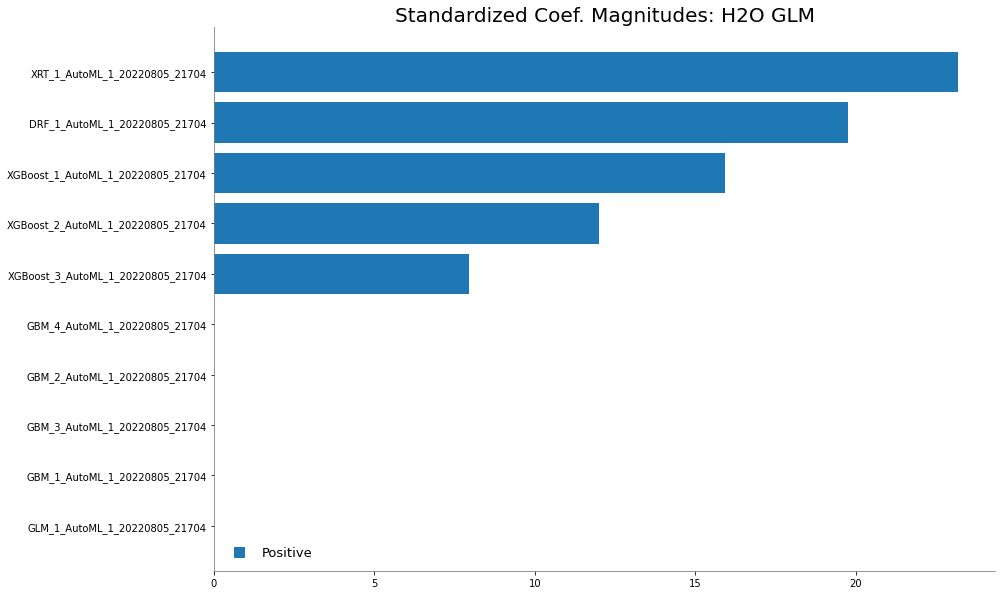

In [20]:
%matplotlib inline
metalearner.std_coef_plot()   

In [21]:
SE.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'base_models': {'actual': [{'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XRT_1_AutoML_1_20220805_21704',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'DRF_1_AutoML_1_20220805_21704',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_4_AutoML_1_20220805_21704',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_2_AutoML_1_20220805_21704',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_3_AutoML_1_20220

In [22]:
SE

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220805_21704

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 527.7096911001296
RMSE: 22.971932680994204
MAE: 13.033932079405568
RMSLE: 0.18566470424806578
R^2: 0.9491299954677391
Mean Residual Deviance: 527.7096911001296
Null degrees of freedom: 10022
Residual degrees of freedom: 10017
Null deviance: 103978496.8974401
Residual deviance: 5289234.233896599
AIC: 91287.68145197502

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 4551.236289616495
RMSE: 67.46285118208758
MAE: 32.7514705785048
RMSLE: 0.3926113346822482
R^2: 0.561297338988975
Mean Residual Deviance: 4551.236289616495
Null degrees of freedom: 15854
Residual degrees of freedom: 15849
Null deviance: 164493311.0960292
Residual deviance: 72159851.37186953
AIC: 178557.65052346472

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,3.273680e+01,1.119903e+00,3.163240e+01,3.207299e+01,3.344030e+01,3.219800e+01,3.434029e+01
1,mean_residual_deviance,4.554674e+03,4.394971e+02,4.215713e+03,4.215392e+03,4.619903e+03,4.442565e+03,5.279795e+03
2,mse,4.554674e+03,4.394971e+02,4.215713e+03,4.215392e+03,4.619903e+03,4.442565e+03,5.279795e+03
3,null_deviance,3.289866e+07,1.644046e+06,3.134648e+07,3.244519e+07,3.313144e+07,3.197252e+07,3.559768e+07
4,r2,5.618083e-01,1.780390e-02,5.698186e-01,5.876204e-01,5.496027e-01,5.597998e-01,5.422003e-01
5,residual_deviance,1.442941e+07,1.209516e+06,1.347764e+07,1.337965e+07,1.492229e+07,1.407405e+07,1.629345e+07
6,rmse,6.742784e+01,3.193701e+00,6.492852e+01,6.492605e+01,6.796987e+01,6.665257e+01,7.266220e+01
7,rmsle,3.923363e-01,9.117298e-03,3.917854e-01,3.782855e-01,4.007943e-01,3.906985e-01,4.001177e-01


In [23]:
pred=aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [24]:
pred.head()

predict
67.7799
169.703
155.355
133.534
104.906
104.44
61.3693
23.4997
32.0305
40.9646


In [25]:
aml.leader.model_performance(test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 5046.112960007083
RMSE: 71.03599763505179
MAE: 34.33390871030134
RMSLE: 0.4005055725834879
R^2: 0.5440437739787786
Mean Residual Deviance: 5046.112960007083
Null degrees of freedom: 3879
Residual degrees of freedom: 3874
Null deviance: 42947879.984390184
Residual deviance: 19578918.284827482
AIC: 44107.292255869026


In [26]:
h2o.save_model(aml.leader, path="./")

'/content/StackedEnsemble_AllModels_1_AutoML_1_20220805_21704'